In [270]:
import numpy as np
import matplotlib.pyplot as plt

# **Practical One**

In [271]:
import os

# URL of the dataset
url = "https://files.grouplens.org/datasets/movielens/ml-32m.zip"
#url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
zip_file = "ml-32m.zip"
extract_folder = "ml-32m"

print(f"Starting download of {url}...")

# Use !wget to download the file in Colab
# -q makes it quiet (less output)
!wget -q $url

print("Download complete.")

# Check if the file was downloaded successfully
if os.path.exists(zip_file):
    print(f"Successfully downloaded {zip_file}.")

    # Unzip the file
    print(f"Unzipping {zip_file}...")
    # -o overwrites existing files without asking
    # -d specifies the directory to extract to
    !unzip -o $zip_file -d $extract_folder

    print(f"Successfully unzipped to '{extract_folder}' folder.")

    # List the contents of the extracted folder
    print(f"\nContents of {extract_folder}:")
    !ls -l $extract_folder

    # Optional: Clean up the zip file after extraction
    # print(f"Cleaning up {zip_file}...")
    # os.remove(zip_file)
    # print("Zip file removed.")
else:
    print(f"Error: {zip_file} was not downloaded.")

Starting download of https://files.grouplens.org/datasets/movielens/ml-32m.zip...
Download complete.
Successfully downloaded ml-32m.zip.
Unzipping ml-32m.zip...
Archive:  ml-32m.zip
  inflating: ml-32m/ml-32m/tags.csv  
  inflating: ml-32m/ml-32m/links.csv  
  inflating: ml-32m/ml-32m/README.txt  
  inflating: ml-32m/ml-32m/checksums.txt  
  inflating: ml-32m/ml-32m/ratings.csv  
  inflating: ml-32m/ml-32m/movies.csv  
Successfully unzipped to 'ml-32m' folder.

Contents of ml-32m:
total 9
drwxrwxr-x 2 tasneem people 8 Nov 18 19:33 ml-32m


In [272]:
import pandas as pd

In [273]:
data = pd.read_csv('/home/tasneem/Desktop/MLatScale/ml-32m/ml-32m/ratings.csv')

In [274]:
data['userId'].unique()

array([     1,      2,      3, ..., 200946, 200947, 200948])

In [275]:
data_movies = pd.read_csv('/home/tasneem/Desktop/MLatScale/ml-32m/ml-32m/movies.csv')

In [276]:
data.shape

(32000204, 4)

In [277]:
userId_to_idx = {}
idx_to_userId = []

In [278]:
movieId_to_idx = {}
index_to_movieId = []
SparseMatrixBycolumn = []

In [280]:
userIdx = 0
movieIdx = 0

In [281]:
import csv
file_path = '/home/tasneem/Desktop/MLatScale/ml-32m/ml-32m/ratings.csv'
with open(file_path, 'r', newline='') as file:

    reader = csv.reader(file, delimiter=',')
    next(reader) # Skip the header row

    for row in reader:
      userId, movieId, rating, _ = int(row[0]), int(row[1]), float(row[2]), int(row[3])
      if not userId in userId_to_idx.keys() :
        userId_to_idx[userId] = userIdx
        idx_to_userId.append(userId)
        userIdx+=1

      if not movieId in  movieId_to_idx.keys():
        movieId_to_idx[movieId] = movieIdx
        index_to_movieId.append(movieId)
        movieIdx+=1

In [282]:
SparseMatrixByRow = [[] for _ in range(len(userId_to_idx))]
SparseMatrixByColumn = [[] for _ in range(len(movieId_to_idx))]

In [283]:
data_by_user_train = [[] for _ in range(len(userId_to_idx))]
data_by_user_test = [[] for _ in range(len(userId_to_idx))]

data_by_movie_train = [[] for _ in range(len(movieId_to_idx))]
data_by_movie_test = [[] for _ in range(len(movieId_to_idx))]

In [284]:
#R = np.zeros((len(userId_to_idx), len(movieId_to_idx)))

In [285]:
with open(file_path, 'r', newline='') as file:
  reader = csv.reader(file, delimiter = ',')
  next(reader)
  for row in reader:
    userId, movieId, rating, _ = int(row[0]), int(row[1]), float(row[2]), int(row[3])

    userIdIdx = userId_to_idx[userId]
    movieIdIdx = movieId_to_idx[movieId]

    SparseMatrixByRow[userIdIdx].append((movieIdIdx, rating))
    SparseMatrixByColumn[movieIdIdx].append((userIdIdx, rating))


    if np.random.random() <= 0.9:
      data_by_user_train[userIdIdx].append((movieIdIdx, rating))
      data_by_movie_train[movieIdIdx].append((userIdIdx, rating))
      #R[userIdIdx][movieIdIdx] = rating
    else:
      data_by_user_test[userIdIdx].append((movieIdIdx, rating))
      data_by_movie_test[movieIdIdx].append((userIdIdx, rating))





In [286]:
len(SparseMatrixByColumn[0])

22251

In [287]:
# for m in range(len(data_by_user_train)):
#   for n in range(len(data_by_user_train[m])):
#     R[m][n] = data_by_user_train[m][n][1]

In [288]:
dummy_user

[[(831, 5)]]

In [ ]:
userId_to_idx[200949]

200950

In [ ]:
data_by_user_train[-1]

[(145, 4.5), (150, 5)]

In [ ]:
data_by_user_train[100][2][1]

4.0

In [ ]:
# R[100][2]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_rated_movies_ids_for_user(userId):
  userIdx = userId_to_idx[userId]
  return SparseMatrixByRow[userIdx]


def get_users_by_movie_id(movieId):
  movieIdx = movieId_to_idx[movieId]
  return SparseMatrixByColumn[movieIdx]

In [ ]:
degrees_of_users = {}

In [ ]:
for userId in userId_to_idx.keys():
  user_movies = get_rated_movies_ids_for_user(userId)
  degree = len(user_movies)

  if degree in degrees_of_users.keys():
    degrees_of_users[degree] += 1
  else:
    degrees_of_users[degree] = 1

In [ ]:
degrees_of_movies = {}

In [ ]:
for movieId in movieId_to_idx.keys():
  movie_users = get_users_by_movie_id(movieId)
  degree = len(movie_users)

  if degree in degrees_of_movies.keys():
    degrees_of_movies[degree] += 1
  else:
    degrees_of_movies[degree] = 1

In [ ]:
# Create scatter plot
users_degress = list(degrees_of_users.keys())
users_degress_frequencies = list(degrees_of_users.values())

movies_degrees = list(degrees_of_movies.keys())
movies_degress_frequencies = list(degrees_of_movies.values())


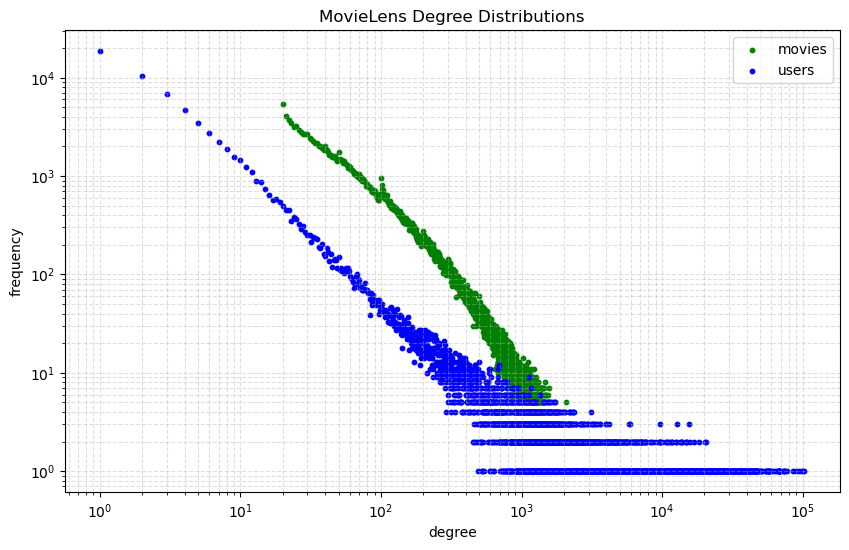

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(users_degress, users_degress_frequencies, s=10, color='green', label='movies')
plt.scatter(movies_degrees, movies_degress_frequencies, s=10, color='blue', label='users')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.legend()
plt.title('MovieLens Degree Distributions')
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()

## *Are there power laws in the data? Is it scale-free?*


The data distribution appears to follow a power-law pattern. Both lines are nearly straight, indicating that the network is scale-free. This means it lacks a characteristic degree, and scaling the data by any constant factor would not alter the shape of the distribution—it would only rescale it.


# **Practical Two**

## **Initialization**

In [ ]:
num_users = len(data_by_user_train)
num_movies = len(data_by_movie_train)
lam = 0.5
gamma = 5
lr = 0.001
num_iters = 50

In [ ]:
biases_users = np.zeros(num_users)
biases_movies = np.zeros(num_movies)

In [ ]:
loss_function_train = []
loss_function_test = []
RMSE_train = []
RMSE_test = []

## **Defining loss functions**

In [ ]:
def compute_loss(data, user_biases, item_biases, mu, gamma):
    loss = 0.0
    # Flatten all ratings into arrays
    users = []
    items = []
    ratings = []
    for m in range(len(data)):
        for n, r in data[m]:
            users.append(m)
            items.append(n)
            ratings.append(r)

    users = np.array(users)
    items = np.array(items)
    ratings = np.array(ratings)

    # Predicted ratings
    preds = mu + user_biases[users] + item_biases[items]

    # Squared error
    loss = np.sum((ratings - preds) ** 2)

    # Regularization
    loss += gamma * (np.sum(user_biases ** 2) + np.sum(item_biases ** 2))
    return loss


In [ ]:
def compute_rmse(data, user_biases, item_biases, mu):
    # Flatten all ratings into arrays
    users = []
    items = []
    ratings = []
    for m in range(len(data)):
        for n, r in data[m]:
            users.append(m)
            items.append(n)
            ratings.append(r)

    users = np.array(users)
    items = np.array(items)
    ratings = np.array(ratings)

    # Predicted ratings
    preds = mu + user_biases[users] + item_biases[items]

    # RMSE
    rmse = np.sqrt(np.mean((ratings - preds) ** 2))
    return rmse

## **Training loop**

In [ ]:
mu = np.mean([r for user_ratings in data_by_user_train for _, r in user_ratings]) # Global Rating

In [ ]:
for iter in range(num_iters):
    # Update user biases
    for m in range(num_users):
        ratings = data_by_user_train[m]
        bias = 0
        item_counter = 0
        for n, r in ratings:
            b_movie = biases_movies[n]
            bias += lam * (r - b_movie)
            item_counter += 1
        if item_counter > 0:
            biases_users[m] = bias / (lam * item_counter + gamma)

    # Update movie biases
    for n in range(num_movies):
        ratings = data_by_movie_train[n]
        bias = 0
        user_counter = 0
        for m, r in ratings:
            b_user = biases_users[m]
            bias += lam * (r - b_user)
            user_counter += 1
        if user_counter > 0:
            biases_movies[n] = bias / (lam * user_counter + gamma)

    # Compute losses and RMSE (optional: every few iterations)
    train_loss = compute_loss(data_by_user_train, biases_users, biases_movies, mu, gamma)
    test_loss = compute_loss(data_by_user_test, biases_users, biases_movies, mu, gamma)

    train_rmse = compute_rmse(data_by_user_train, biases_users, biases_movies, mu)
    test_rmse = compute_rmse(data_by_user_test, biases_users, biases_movies, mu)

    loss_function_train.append(train_loss)
    loss_function_test.append(test_loss)

    RMSE_train.append(train_rmse)
    RMSE_test.append(test_rmse)


## **Train and Test Losses over the number of iterations**

In [ ]:
iterations = range(1, len(loss_function_train) + 1)
iterations1 = range(1, len(loss_function_test) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations, loss_function_train, marker='o', label='Train Loss')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Training dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations1, loss_function_test, marker='s', color='red', label='Test Loss')
ax2.set_ylabel('Loss')
ax2.set_title('Loss over Testing dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

## **Train and Test Root Mean Square Errors over the number of iterations**

In [ ]:
iterations2 = range(1, len(RMSE_train) + 1)
iterations3 = range(1, len(RMSE_test) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations2, RMSE_train, marker='o', color='blue', label='Train RMSE')
ax1.set_ylabel('Loss')
ax1.set_title('RMSE over Training dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations3, RMSE_test, marker='s', color='green', label='Test RMSE')
ax2.set_ylabel('Loss')
ax2.set_title('RMSE over Testing dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

# **Practical Three**

## **Initialization**

In [29]:
num_users = len(data_by_user_train)
num_movies = len(data_by_movie_train)

K = 10 # Latent dimensions

U = np.random.normal(scale = 1, size= (num_users, K))
V = np.random.normal(scale = 1, size= (num_movies, K))

biases_users = np.zeros(num_users)
biases_movies = np.zeros(num_movies)

In [70]:
lam = 0.5
gamma = 0.5
tau = 10
num_iters = 25

In [31]:
loss_history_train = []
loss_history_test = []

RMSE_train_history = []
RMSE_test_history = []

## **Defining loss functions**

In [32]:
def compute_loss_(data_user, N, user_biases, item_biases, lam, tau, gamma):
    loss = 0.0
    reg_user = 0
    reg_item = 0
    error_squared = 0
    for m in range(len(data_user)):
        for n, r in data_user[m]:
          pred = user_biases[m] + item_biases[n] + U[m] @ V[n]
          error_squared+= (r - pred) ** 2
        reg_user+= np.dot(U[m], U[m])
    for n in range(N):
        reg_item+= np.dot(V[n], V[n])
    loss = 0.5 * lam * error_squared + 0.5 * tau * reg_user + 0.5 * tau * reg_item + 0.5 * gamma * (np.sum(user_biases ** 2) + np.sum(item_biases ** 2))
    return loss

In [33]:
def compute_RMSE_(data_user, user_biases, item_biases):
  error_squared = 0
  count = 0
  for m in range(len(data_user)):
    for n, r in data_user[m]:
      pred = user_biases[m] +  item_biases[n] + U[m] @ V[n]
      error_squared+= (r - pred) **2
      count+=1
  rmse = np.sqrt(error_squared / count)
  return rmse

## **Training Loop**

In [34]:
for iter in range(num_iters):
  # Update user biases and user embeddings
    for m in range(num_users):
        ratings = data_by_user_train[m]
        bias = 0
        item_counter = 0

        for n, r in ratings:
            pred = U[m] @ V[n] + biases_movies[n]
            bias += lam * (r - pred)
            item_counter += 1
        if item_counter > 0:
            biases_users[m] = bias / (lam * item_counter + gamma)

        numerator = np.zeros(K)
        denominator = tau * np.eye(K)

        for n, r in ratings:
          numerator+= lam * (r - biases_movies[n] - biases_users[m]) * V[n]
          denominator+= lam * np.outer(V[n], V[n])
        U[m] = np.linalg.solve(denominator, numerator)

    # Update movie biases and movie embeddings
    for n in range(num_movies):
        ratings = data_by_movie_train[n]
        bias = 0
        user_counter = 0

        for m, r in ratings:
            b_user = biases_users[m]
            bias += lam * (r - b_user)
            user_counter += 1
        if user_counter > 0:
            biases_movies[n] = bias / (lam * user_counter + gamma)

        numerator = np.zeros(K)
        denominator = tau * np.eye(K)

        for m, r in ratings:
          numerator+= lam * (r - biases_movies[n] - biases_users[m]) * U[m]
          denominator+= lam * np.outer(U[m], U[m])
        V[n] = np.linalg.solve(denominator, numerator)

    train_loss = compute_loss_(data_by_user_train, num_movies, biases_users, biases_movies, lam, tau, gamma)
    test_loss = compute_loss_(data_by_user_train, num_movies, biases_users, biases_movies, lam, tau, gamma)

    train_rmse = compute_RMSE_(data_by_user_train, biases_users, biases_movies)
    test_rmse = compute_RMSE_(data_by_user_test, biases_users, biases_movies)

    loss_history_train.append(train_loss)
    loss_history_test.append(test_loss)

    RMSE_train_history.append(train_rmse)
    RMSE_test_history.append(test_rmse)

    if (iter) % 5 == 0:
      print(f'Iteration: {iter} | Train loss: {train_loss} | Test loss: {test_loss} | RMSE_train:{train_rmse} | RMSE_test:{test_rmse}')




Iteration: 0 | Train loss: 6222210.626577266 | Test loss: 6222210.626577266 | RMSE_train:0.862814078382 | RMSE_test:0.9127997819111972
Iteration: 5 | Train loss: 4725895.33480326 | Test loss: 4725895.33480326 | RMSE_train:0.7394907115244077 | RMSE_test:0.7887149381566061
Iteration: 10 | Train loss: 4566058.605554329 | Test loss: 4566058.605554329 | RMSE_train:0.7349091289413205 | RMSE_test:0.7842219569676268
Iteration: 15 | Train loss: 4462741.252233349 | Test loss: 4462741.252233349 | RMSE_train:0.7328474563289202 | RMSE_test:0.7826164587709664
Iteration: 20 | Train loss: 4391238.932844124 | Test loss: 4391238.932844124 | RMSE_train:0.731309836884806 | RMSE_test:0.7816411823866399


Train Dummy User

In [66]:
mu = np.mean([r for user_ratings in data_by_user_train for _, r in user_ratings]) # Global Rating

In [289]:
def add_dummy_user(movie_idx, rating, dataset_by_user, user_id):
    user = [(n, r) for n, r in zip(movie_idx, rating)]
    userId_to_idx[user_id] = len(userId_to_idx) + 1
    dataset_by_user.append(user)
    return [user]

In [290]:
def update_dummy_user(dummy_user, item_vectors, item_biases, lam, tau, gamma, K, mu):
    dummy_bias = 0
    item_counter = 0
    for m in range(len(dummy_user)):
        for n, r in dummy_user[m]:

            pred = mu + item_biases[n]
            dummy_bias += lam * (r - pred)

            dummy_bias = dummy_bias / (lam * item_counter + gamma)
            item_counter+=1

        numerator = np.zeros(K)
        denominator = tau * np.eye(K)

        for n, r in dummy_user[m]:
          numerator+= lam * (r - item_biases[n] - dummy_bias) * item_vectors[n]
          denominator+= lam * np.outer(item_vectors[n], item_vectors[n])
        u = np.linalg.solve(denominator, numerator)
    
    return u, dummy_bias
        

In [291]:
def retrieve_moviesIds(sorted_scores_list):
    top_scores_ids = []
    
    for i in range(len(sorted_scores_list)):
        top_scores_ids.append(sorted_scores_list[i][0])
    
    return top_scores_ids

In [292]:
data_movies[30:40]

,movieId,title,genres
30,31,Dangerous Minds (1995),Drama
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
32,33,Wings of Courage (1995),Adventure|Romance|IMAX
33,34,Babe (1995),Children|Drama
34,35,Carrington (1995),Drama|Romance
35,36,Dead Man Walking (1995),Crime|Drama
36,37,Across the Sea of Time (1995),Documentary|IMAX
37,38,It Takes Two (1995),Children|Comedy
38,39,Clueless (1995),Comedy|Romance
39,40,"Cry, the Beloved Country (1995)",Drama


In [298]:
def search_movie(movie_name):
  movie_name_lower = movie_name.lower()
  result = data_movies[data_movies['title'].str.lower().str.contains(movie_name_lower)][['movieId', 'title', 'genres']]
  if len(result) > 0:
    return result.to_dict('records')
  else:
    return None

In [313]:
movies = search_movie('inception')

In [314]:
movies

[{'movieId': 79132,
  'title': 'Inception (2010)',
  'genres': 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'}]

In [315]:
index =movieId_to_idx[movies[0]['movieId']]

In [316]:
movie_idx = [index]
ratings = [5]

dummy_user = add_dummy_user(movie_idx, ratings, data_by_user_train, 200949)

In [317]:
dummy_user_vector = np.random.normal(scale = 1, size= (1, K))

dummy_bias = 0

for iter in range(10):
    dummy_user_vector, dummy_bias = update_dummy_user(dummy_user=dummy_user, item_vectors=V, item_biases=biases_movies, lam=0.5, tau=10, gamma=0.5, K=K, mu=mu)
    

In [318]:
dummy_user_vector, dummy_bias

(array([ 0.12151995,  0.15187381,  0.07550364, -0.05550816,  0.20933931,
        -0.14855427,  0.11154439, -0.15280063, -0.01877388, -0.03362338]),
 -0.8971819376068293)

In [319]:
scores = []

In [320]:

for n in range(len(movieId_to_idx)):
    movie_id = index_to_movieId[n]
    score = dummy_user_vector @ V[n]  + 0.05 * biases_movies[n] + mu
    scores.append((movie_id, score))

In [321]:
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)


In [322]:
ids_top_scores = retrieve_moviesIds(sorted_scores[:10])
ids_top_scores

[7153, 5952, 4993, 58559, 79132, 109487, 91529, 72998, 33493, 110]

In [323]:
data_movies[data_movies['movieId'].isin(ids_top_scores)]

,movieId,title,genres
108,110,Braveheart (1995),Action|Drama|War
4888,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
5841,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
7029,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
9954,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi
12223,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
14104,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
14939,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
17469,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX
21207,109487,Interstellar (2014),Sci-Fi|IMAX


In [784]:
print(dummy_user_vector)
print("norm:", np.linalg.norm(dummy_user_vector))
print("user_bias:", dummy_bias)


[-0.12944673 -0.0052152   0.29827921  0.08937223  0.12911356 -0.05907048
  0.03215951 -0.01808348 -0.09994505 -0.07848837]
norm: 0.38911675287758235
user_bias: -0.43256108685509176


Polarizing Movies

In [420]:
def polarizing_movies(item_vectors):
    item_norms = []
    for n in range(len(item_vectors)):
        norm = np.linalg.norm(item_vectors[n])
        mov_id = index_to_movieId[n]
        item_norms.append((mov_id, norm))
    norms_sorted = sorted(norms, key=lambda x: x[1], reverse=True)
    return norms_sorted

In [421]:
norms = polarizing_movies(V)

In [422]:
norms[:10]

[(7153, 7.309000218832531),
 (231, 7.261433024993546),
 (4993, 7.1871889918347875),
 (5952, 7.160082679947262),
 (344, 6.588648096621315),
 (288, 6.494071360580569),
 (260, 6.376766769090261),
 (19, 6.296795052206758),
 (2628, 6.169688846402347),
 (2710, 6.138628770351755)]

Top-ten polarizing movies

In [442]:
ids = [7153, 231, 4993, 5952, 344, 288, 260, 19, 2628, 2710]
data_movies[data_movies['movieId'].isin(ids)]


,movieId,title,genres
18,19,Ace Ventura: When Nature Calls (1995),Comedy
228,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
285,288,Natural Born Killers (1994),Action|Crime|Thriller
339,344,Ace Ventura: Pet Detective (1994),Comedy
2537,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
2618,2710,"Blair Witch Project, The (1999)",Drama|Horror|Thriller
4888,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
5841,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
7029,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


## **Train and Test Losses over the number of iterations**

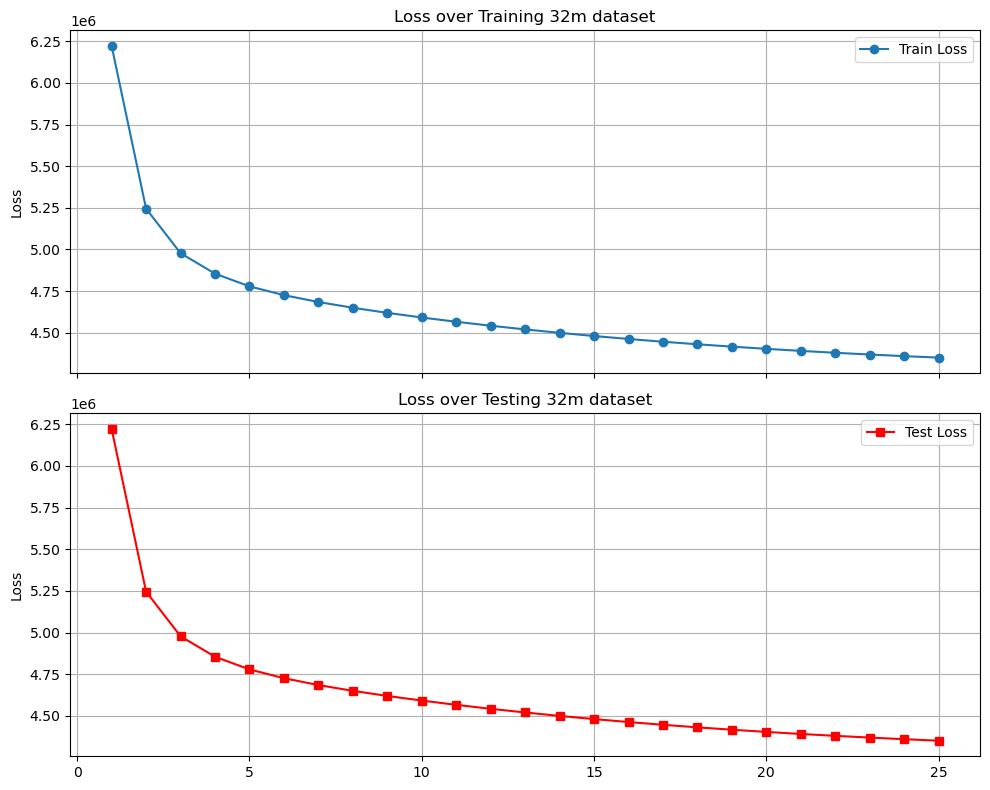

In [40]:
iterations = range(1, len(loss_history_train) + 1)
iterations1 = range(1, len(loss_history_test) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations, loss_history_train, marker='o', label='Train Loss')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Training 32m dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations1, loss_history_test, marker='s', color='red', label='Test Loss')
ax2.set_ylabel('Loss')
ax2.set_title('Loss over Testing 32m dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

## **Train and Test Root Mean Squared Errors over the number of iterations**

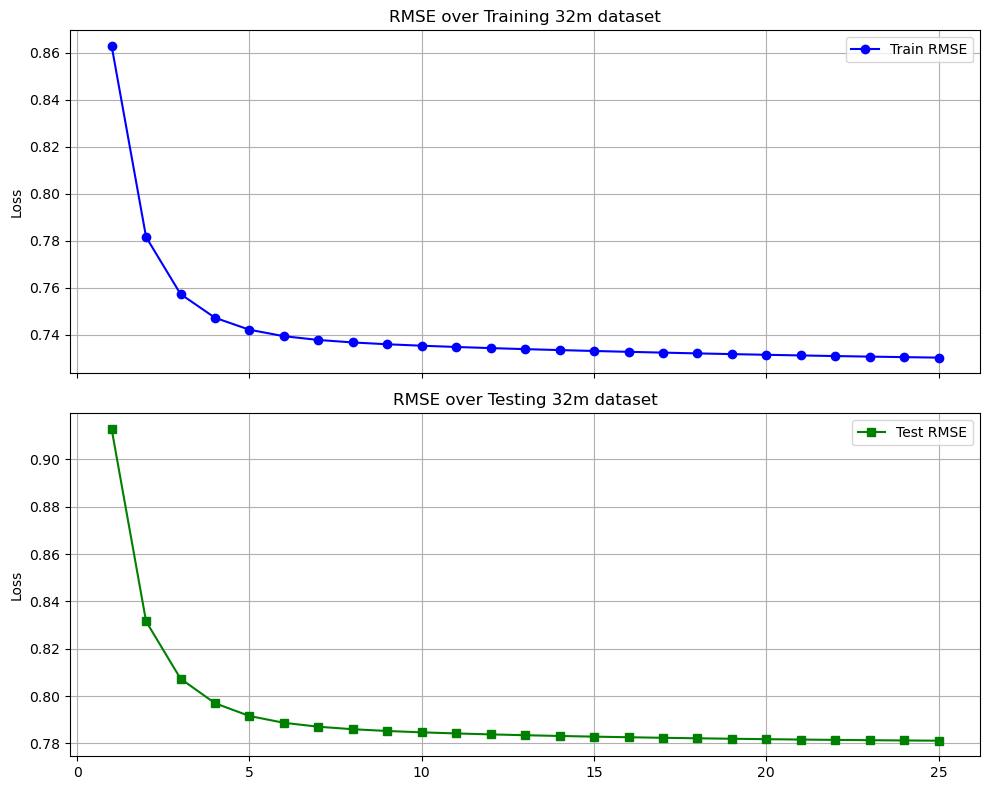

In [42]:
iterations2 = range(1, len(RMSE_train_history) + 1)
iterations3 = range(1, len(RMSE_test_history) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations2, RMSE_train_history, marker='o', color='blue', label='Train RMSE')
ax1.set_ylabel('Loss')
ax1.set_title('RMSE over Training 32m dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations3, RMSE_test_history, marker='s', color='green', label='Test RMSE')
ax2.set_ylabel('Loss')
ax2.set_title('RMSE over Testing 32m dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

In [533]:
import pickle

In [534]:
with open('users_latent_vectors.pkl', 'wb') as file:
    pickle.dump(U, file)

In [535]:
with open('movies_latent_vectors.pkl', 'wb') as file:
    pickle.dump(V, file)

In [536]:
with open('item_biases.pkl', 'wb') as file:
    pickle.dump(biases_movies, file)

In [537]:
with open('users_biases.pkl', 'wb') as file:
    pickle.dump(biases_users, file)